In [1]:
import time

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from msmbuilder import cluster
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

In [2]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 2500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
blobs = np.concatenate([
    np.array([[0,-1]]) + 0.5 * np.random.randn(n_samples/3, 2),
    np.array([[5, 0]]) + 0.1 * np.random.randn(n_samples/3, 2),
    np.array([[0, 5]]) + 2.0 * np.random.randn(n_samples/3, 2),

]), None

no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

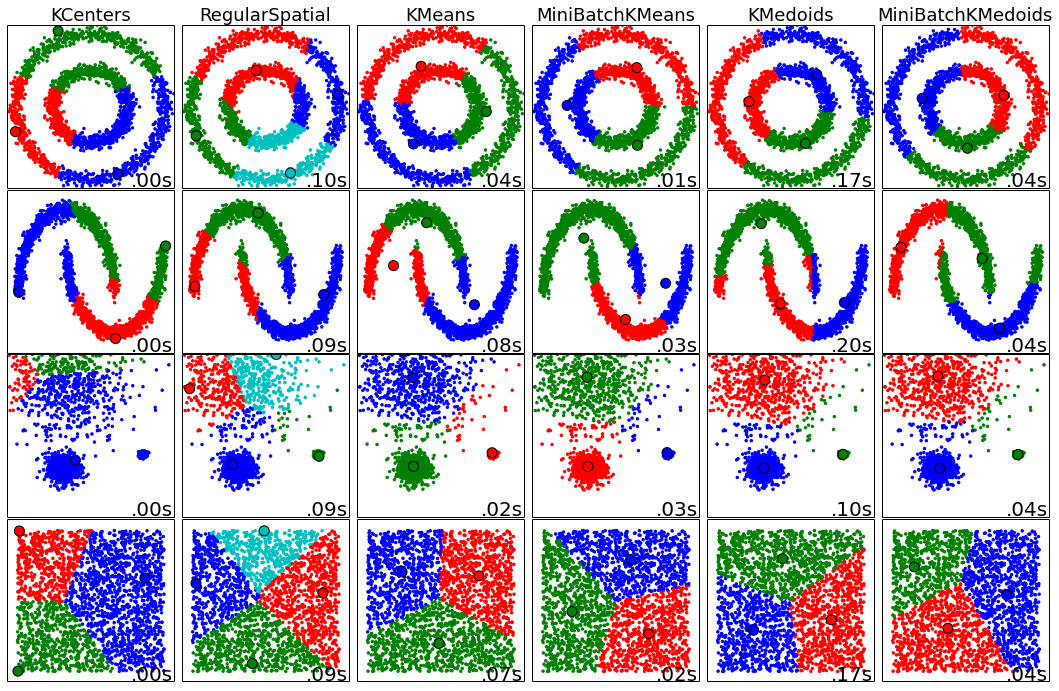

In [3]:
plt.figure(figsize=(14.5, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs,
                                     no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)


    # create clustering estimators
    kcenters = cluster.KCenters(n_clusters=3)
    rs = cluster.RegularSpatial(d_min=2)
    kmeans = cluster.KMeans(n_clusters=3)
    kmeans2 = cluster.MiniBatchKMeans(n_clusters=3)
    kmedoids = cluster.KMedoids(n_clusters=3)
    kmedoids2 = cluster.MiniBatchKMedoids(n_clusters=3)
    
    for name, algorithm in [
                            ('KCenters', kcenters),
                            ('RegularSpatial', rs),
                            ('KMeans', kmeans),
                            ('MiniBatchKMeans', kmeans2),
                            ('KMedoids', kmedoids),
                            ('MiniBatchKMedoids', kmedoids2)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit([X])
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_[0].astype(np.int)
        else:
            y_pred = algorithm.predict([X])[0]

        # plot
        plt.subplot(4, 6, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=6)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=20,
                 horizontalalignment='right')
        plot_num += 1